In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import sklearn.tree as tree
import statsmodels.api as sm
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from scipy.stats import ttest_rel
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

In [6]:
product = pd.read_csv('product_hierarchy.csv')
product_cluster = product.loc[:,['product_id','cluster_id']]
product_cluster

,product_id,cluster_id
0,P0000,NaN
1,P0001,cluster_5
2,P0002,cluster_0
3,P0004,cluster_3
4,P0005,cluster_9
...,...,...
694,P0744,NaN
695,P0745,cluster_0
696,P0746,cluster_0
697,P0747,cluster_0


In [22]:
sales = pd.read_csv('retailsales.csv')
sales = sales.replace(0, np.nan)
sales_clean = sales[sales['sales'].notna()]

/Users/violetyoyo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
store = pd.read_csv('store_cities.csv')

sns.scatterplot(data=store)

In [23]:
sales_cities = sales_clean.merge(store, how='outer', on='store_id')
sales_cities

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,storetype_id,store_size,city_id
0,P0001,S0012,2017-01-02,1.0,5.30,NaN,6.25,PR14,NaN,PR03,NaN,NaN,NaN,ST04,28,C005
1,P0017,S0012,2017-01-02,1.0,1.38,10.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,ST04,28,C005
2,P0018,S0012,2017-01-02,1.0,1.81,16.0,1.95,PR14,NaN,PR03,NaN,NaN,NaN,ST04,28,C005
3,P0079,S0012,2017-01-02,1.0,2.08,35.0,2.25,PR14,NaN,PR03,NaN,NaN,NaN,ST04,28,C005
4,P0103,S0012,2017-01-02,2.0,4.91,87.0,2.65,PR14,NaN,PR03,NaN,NaN,NaN,ST04,28,C005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189677,P0499,S0047,2019-10-31,1.0,0.93,39.0,0.75,PR14,NaN,PR03,NaN,NaN,NaN,ST03,14,C031
3189678,P0500,S0047,2019-10-31,1.0,11.11,18.0,12.00,PR09,low,PR03,NaN,NaN,NaN,ST03,14,C031
3189679,P0536,S0047,2019-10-31,1.0,4.40,11.0,4.75,PR14,NaN,PR03,NaN,NaN,NaN,ST03,14,C031
3189680,P0663,S0047,2019-10-31,1.0,5.51,18.0,6.75,PR10,verylow,PR03,NaN,NaN,NaN,ST03,14,C031


In [32]:
sales_cities_product = sales_cities.merge(product, how='outer', on='product_id')
sales_cities_product['date'] = pd.to_datetime(sales_cities_product['date'])
sales_cities_product_clean = sales_cities_product[sales_cities_product['sales'].notna()]
sales_cities_product_clean

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0001,S0012,2017-01-02,1.000,5.30,NaN,6.25,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,P0001,S0012,2017-11-11,1.000,6.57,10.000,7.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0001,S0012,2017-12-16,1.000,5.72,8.000,6.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,P0001,S0012,2018-01-05,1.000,5.72,7.000,6.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,P0001,S0012,2018-02-21,1.000,5.72,6.000,6.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189677,P0728,S0069,2019-07-11,11.000,116.62,92.386,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
3189678,P0728,S0069,2019-07-12,9.345,99.10,83.041,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
3189679,P0728,S0069,2019-07-13,3.895,41.31,79.146,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
3189680,P0728,S0069,2019-07-14,2.710,28.73,76.436,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104


In [34]:
August = sales_cities_product_clean.loc[sales_cities_product_clean.date.dt.month == 8]
Augustin2019 = August.loc[August.date.dt.month == 8]
Augustin2019

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
48,P0001,S0056,2018-08-05,1.0,7.42,2.0,8.75,PR14,NaN,PR03,...,C015,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
49,P0001,S0056,2018-08-13,2.0,11.12,NaN,8.75,PR05,low,PR03,...,C015,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
58,P0001,S0103,2017-08-08,1.0,5.72,NaN,6.75,PR14,NaN,PR03,...,C022,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
99,P0001,S0001,2018-08-01,2.0,14.83,13.0,8.75,PR14,NaN,PR03,...,C031,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
100,P0001,S0001,2018-08-03,2.0,14.83,11.0,8.75,PR14,NaN,PR03,...,C031,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189629,P0243,S0115,2019-08-20,2.0,42.59,NaN,23.00,PR14,NaN,PR03,...,C020,1.0,1.0,1.0,cluster_0,H00,H0004,H000403,H00040310,H0004031012
3189630,P0243,S0115,2019-08-21,1.0,21.30,NaN,23.00,PR14,NaN,PR03,...,C020,1.0,1.0,1.0,cluster_0,H00,H0004,H000403,H00040310,H0004031012
3189631,P0243,S0115,2019-08-26,3.0,63.89,NaN,23.00,PR14,NaN,PR03,...,C020,1.0,1.0,1.0,cluster_0,H00,H0004,H000403,H00040310,H0004031012
3189632,P0243,S0115,2019-08-27,1.0,21.30,NaN,23.00,PR14,NaN,PR03,...,C020,1.0,1.0,1.0,cluster_0,H00,H0004,H000403,H00040310,H0004031012


In [39]:
Augustin2019_df_product = Augustin2019.loc[:,['product_id','sales','revenue']].copy()
Augustin2019_df_product = Augustin2019_df_product.set_index('product_id')
Augustin2019_df_product

,sales,revenue
product_id,,
P0001,1.0,7.42
P0001,2.0,11.12
P0001,1.0,5.72
P0001,2.0,14.83
P0001,2.0,14.83
...,...,...
P0243,2.0,42.59
P0243,1.0,21.30
P0243,3.0,63.89


In [41]:
result_df_product = Augustin2019_df_product.groupby(Augustin2019_df_product.index).apply(np.sum)
result_df_product

,sales,revenue
product_id,,
P0001,243.0,1894.63
P0002,2.0,438.98
P0004,36.0,152.50
P0005,72.0,2640.56
P0006,14.0,314.40
...,...,...
P0741,47.0,995.26
P0742,21.0,1021.43
P0746,74.0,715.17


In [42]:
ProductP0747 = sales_cities_product_clean.loc[sales_cities_product_clean.product_id == 'P0747']
ProductP0747

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
1118700,P0747,S0012,2017-01-03,1.0,10.13,2.0,11.95,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118701,P0747,S0012,2017-01-05,2.0,20.25,4.0,11.95,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118702,P0747,S0012,2017-01-06,1.0,10.13,3.0,11.95,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118703,P0747,S0012,2017-01-07,1.0,10.13,2.0,11.95,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118704,P0747,S0012,2017-01-25,1.0,10.13,5.0,11.95,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134155,P0747,S0047,2019-08-16,8.0,148.47,7.0,21.90,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134156,P0747,S0047,2019-08-17,4.0,74.24,3.0,21.90,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134157,P0747,S0047,2019-08-20,1.0,18.56,2.0,21.90,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134158,P0747,S0047,2019-08-26,1.0,18.56,1.0,21.90,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [43]:
compare_df_ProductP0747 = ProductP0747.loc[:,['date','sales','revenue']].copy()
compare_df_ProductP0747 = compare_df_ProductP0747.set_index('date')
compare_df_ProductP0747

,sales,revenue
date,,
2017-01-03,1.0,10.13
2017-01-05,2.0,20.25
2017-01-06,1.0,10.13
2017-01-07,1.0,10.13
2017-01-25,1.0,10.13
...,...,...
2019-08-16,8.0,148.47
2019-08-17,4.0,74.24
2019-08-20,1.0,18.56


In [44]:
result_df_ProductP0747 = compare_df_ProductP0747.groupby(compare_df_ProductP0747.index.year).apply(np.sum)
result_df_ProductP0747

,sales,revenue
date,,
2017,7998.0,86181.11
2018,6786.0,93340.97
2019,16157.0,288695.17


In [49]:
ProductP0747in2019 = ProductP0747.loc[ProductP0747.date.dt.year == 2019]
ProductP0747in2019

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
1118843,P0747,S0012,2019-01-04,2.0,35.42,7.0,20.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118844,P0747,S0012,2019-01-06,1.0,17.71,7.0,20.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118845,P0747,S0012,2019-01-07,1.0,17.71,5.0,20.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118846,P0747,S0012,2019-01-09,2.0,35.42,3.0,20.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118847,P0747,S0012,2019-01-16,1.0,17.71,2.0,20.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134155,P0747,S0047,2019-08-16,8.0,148.47,7.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134156,P0747,S0047,2019-08-17,4.0,74.24,3.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134157,P0747,S0047,2019-08-20,1.0,18.56,2.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134158,P0747,S0047,2019-08-26,1.0,18.56,1.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


Text(0.5, 1.0, 'Sales')

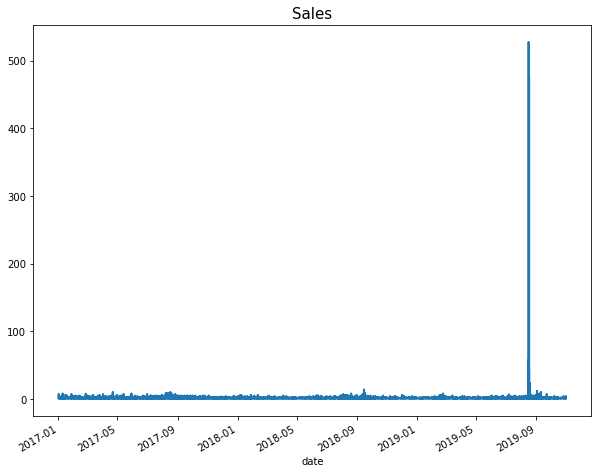

In [51]:
compare_df_ProductP0747.sales.plot(figsize = (10,8), linewidth = 2)
plt.title('Sales',fontsize = 15)

In [52]:
ProductP0747in2019inAugest = ProductP0747in2019.loc[ProductP0747in2019.date.dt.month == 8]
ProductP0747in2019inAugest

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
1118875,P0747,S0012,2019-08-09,1.0,18.56,55.0,21.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118876,P0747,S0012,2019-08-16,22.0,408.31,33.0,21.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118877,P0747,S0012,2019-08-17,26.0,482.54,7.0,21.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1118878,P0747,S0012,2019-08-24,1.0,18.56,6.0,21.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1119045,P0747,S0013,2019-08-01,1.0,18.56,3.0,21.9,PR14,NaN,PR03,...,C026,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134155,P0747,S0047,2019-08-16,8.0,148.47,7.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134156,P0747,S0047,2019-08-17,4.0,74.24,3.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134157,P0747,S0047,2019-08-20,1.0,18.56,2.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134158,P0747,S0047,2019-08-26,1.0,18.56,1.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [53]:
plot = ProductP0747in2019inAugest.loc[:,['date','store_id','revenue']].copy()
plot

,date,store_id,revenue
1118875,2019-08-09,S0012,18.56
1118876,2019-08-16,S0012,408.31
1118877,2019-08-17,S0012,482.54
1118878,2019-08-24,S0012,18.56
1119045,2019-08-01,S0013,18.56
...,...,...,...
1134155,2019-08-16,S0047,148.47
1134156,2019-08-17,S0047,74.24
1134157,2019-08-20,S0047,18.56
1134158,2019-08-26,S0047,18.56


<AxesSubplot:xlabel='date', ylabel='revenue'>

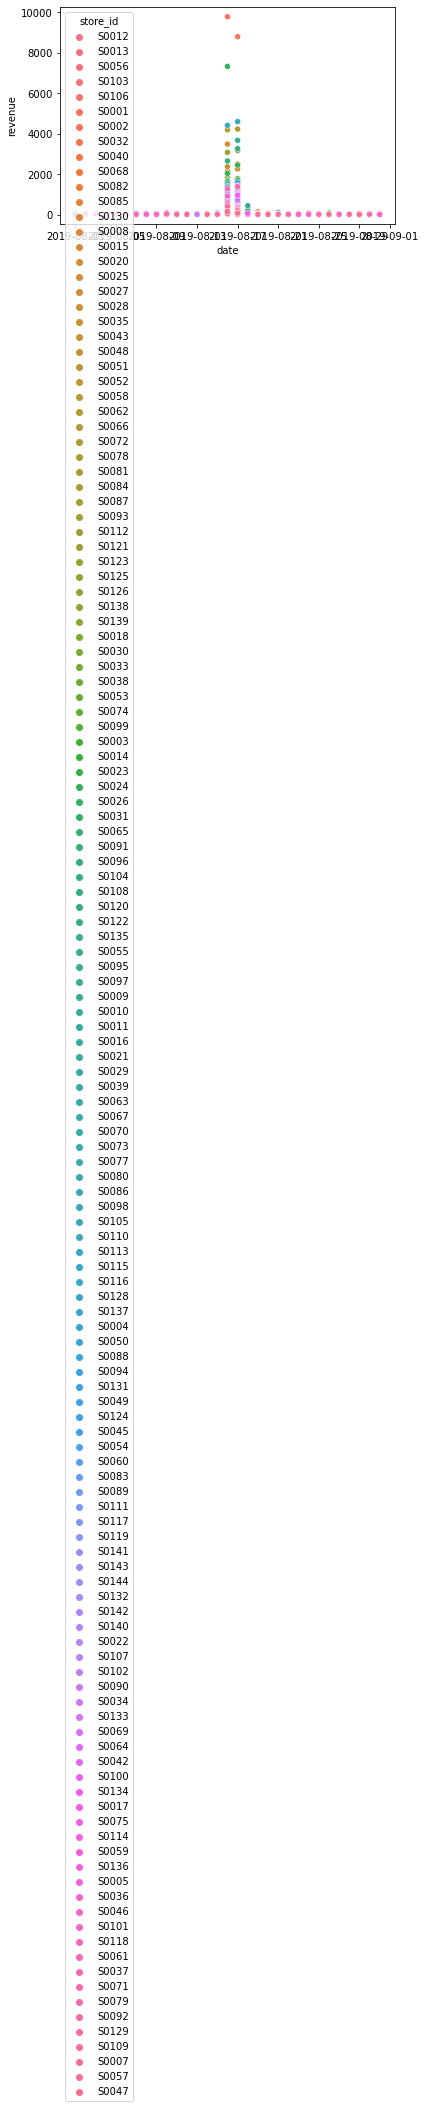

In [63]:
sns.scatterplot(x='date', y='revenue', hue='store_id', data=plot)

In [84]:
hey_1 = sales_cities_product_clean.loc[sales_cities_product_clean.date.dt.month == 8] 
hey_1 = hey_1.loc[hey_1.date.dt.year == 2019] 
hey_1 = hey_1.loc[hey_1.date.dt.day == 16] 
hey_1 = hey_1.loc[:,['product_id','sales','revenue']]
hey_1 = hey_1.set_index('product_id')
hey_3 = hey_1.groupby(hey_1.index).apply(np.sum)
hey_3

,sales,revenue
product_id,,
P0001,3.0,27.84
P0007,3.0,38.61
P0008,2.0,11.02
P0009,2.0,11.02
P0015,44.0,179.20
...,...,...
P0737,2.0,14.38
P0739,7.0,29.66
P0740,1.0,17.71


In [86]:
whathappenthatday = sales_cities_product_clean.loc[sales_cities_product_clean.date.dt.month == 8] 
whathappenthatday = whathappenthatday.loc[whathappenthatday.date.dt.year == 2019] 
whathappenthatday = whathappenthatday.loc[whathappenthatday.date.dt.day == 16] 
whathappenthatday = whathappenthatday.loc[whathappenthatday.product_id == 'P0747'] 
whathappenthatday

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
1118876,P0747,S0012,2019-08-16,22.0,408.31,33.0,21.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1119048,P0747,S0013,2019-08-16,62.0,1150.68,74.0,21.9,PR14,NaN,PR03,...,C026,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1119261,P0747,S0056,2019-08-16,65.0,1206.36,147.0,21.9,PR14,NaN,PR03,...,C015,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1119407,P0747,S0103,2019-08-16,26.0,482.54,25.0,21.9,PR14,NaN,PR03,...,C022,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1119532,P0747,S0106,2019-08-16,16.0,296.95,4.0,21.9,PR14,NaN,PR03,...,C031,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134117,P0747,S0129,2019-08-16,27.0,501.10,20.0,21.9,PR14,NaN,PR03,...,C021,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134140,P0747,S0109,2019-08-16,22.0,408.31,11.0,21.9,PR14,NaN,PR03,...,C005,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134147,P0747,S0007,2019-08-16,5.0,92.80,14.0,21.9,PR14,NaN,PR03,...,C014,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026
1134152,P0747,S0057,2019-08-16,3.0,55.68,5.0,21.9,PR14,NaN,PR03,...,C034,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [89]:
whathappenthatday_1 = whathappenthatday['promo_type_1']
whathappenthatday_1.array

<PandasArray>
['PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14',
 'PR14',
 ...
 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14', 'PR14',
 'PR14']
Length: 130, dtype: object

In [90]:
whathappenthatday_2 = whathappenthatday['promo_type_2']
whathappenthatday_2.array

<PandasArray>
['PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03',
 'PR03',
 ...
 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03', 'PR03',
 'PR03']
Length: 130, dtype: object

In [91]:
PR14 = sales_cities_product_clean.loc[sales_cities_product_clean.promo_type_1 == 'PR14'] 
PR14

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0001,S0012,2017-01-02,1.000,5.30,NaN,6.25,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,P0001,S0012,2017-11-11,1.000,6.57,10.000,7.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0001,S0012,2017-12-16,1.000,5.72,8.000,6.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,P0001,S0012,2018-01-05,1.000,5.72,7.000,6.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,P0001,S0012,2018-02-21,1.000,5.72,6.000,6.75,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189677,P0728,S0069,2019-07-11,11.000,116.62,92.386,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
3189678,P0728,S0069,2019-07-12,9.345,99.10,83.041,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
3189679,P0728,S0069,2019-07-13,3.895,41.31,79.146,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
3189680,P0728,S0069,2019-07-14,2.710,28.73,76.436,11.45,PR14,NaN,PR03,...,C031,3.0,4.0,4.0,cluster_0,H02,H0210,H021000,H02100001,H0210000104
